In [164]:
#importing libraries 
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
import seaborn as sns
from sklearn_extra.cluster import KMedoids
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn.metrics import silhouette_score  
from mpl_toolkits import mplot3d
import sys
sys.path.insert(0,'../src/utils/')
from src.utils import center_based_clustering as  cbc

In [157]:
def plot_elbow(data, model, potential_k_list):
    K_means_visualizer_reduced_data = KElbowVisualizer(model, k=potential_k_list, timings=False)
    K_means_visualizer_reduced_data.fit(data)# Fit the data to the visualizer
    K_means_visualizer_reduced_data.show() 


In [158]:
# Reading data as dataframe
data = pd.read_csv('../data/featsel/data_scaled_minmax.csv')
data

,num_trips,num_walk_trips,num_transit_trips,num_bike_trips,num_taxi_trips,num_tnc_trips,num_complete_weekend_days,num_complete_weekdays,made_trips,age,...,work_cms_zone_Northern Bronx,work_cms_zone_Outer Brooklyn,work_cms_zone_Outer Queens,work_cms_zone_Southern Bronx,work_cms_zone_Staten Island,work_cms_zone_Upper Manhattan,first_travel_date_day,first_travel_date_month,last_travel_date_day,last_travel_date_month
0,0.129213,0.010753,0.052632,0.305556,0.0,0.000000,1.0,1.0,1.0,0.142857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.766667,1.0,0.966667,1.0
1,0.084270,0.021505,0.017544,0.000000,0.0,0.000000,1.0,1.0,1.0,0.142857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.933333,0.0,0.100000,1.0
2,0.168539,0.236559,0.157895,0.000000,0.0,0.000000,1.0,1.0,1.0,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.166667,1.0,0.366667,1.0
3,0.269663,0.247312,0.228070,0.000000,0.0,0.000000,1.0,0.4,1.0,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.500000,1.0,0.700000,1.0
4,0.252809,0.139785,0.105263,0.333333,0.0,0.111111,1.0,1.0,1.0,0.142857,...,0.0,0.0,0.0,0.0,0.0,0.0,0.233333,1.0,0.433333,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3341,0.011236,0.000000,0.035088,0.000000,0.0,0.000000,0.0,0.2,1.0,0.285714,...,0.0,0.0,0.0,0.0,0.0,0.0,0.400000,1.0,0.400000,1.0
3342,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.2,0.0,0.571429,...,0.0,0.0,0.0,0.0,0.0,0.0,0.966667,0.0,0.966667,0.0
3343,0.016854,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.2,1.0,0.428571,...,0.0,0.0,0.0,0.0,0.0,0.0,0.766667,0.0,0.766667,0.0
3344,0.022472,0.000000,0.035088,0.000000,0.0,0.055556,0.5,0.0,1.0,0.000000,...,0.0,1.0,0.0,0.0,0.0,0.0,0.466667,1.0,0.466667,1.0


## Dimentioality Reduction
- Using PCA to reduce the original number of feature to 2, generates only 2 components, So we can plot the data. 

In [159]:
#Initiate a pca model to reduce the dimentions of the data
#so we can plot it in the 2d space (as a post-processing step)
pca_model = PCA(n_components=2, random_state=0) 
#reduce the dimentions of the data used in the training process 
pca_data = pca_model.fit_transform(data)
#reduce the dimentions of the centroids 
pca_data.shape
# define "components_df" that include the valuse for the components after reducing the dimentions 
two_components_df = pd.DataFrame(
    pca_data,
    columns=["component_1", "component_2"],
    )

##### Using the elbow method to find the best value for K, trying K-means++ using the original dataset

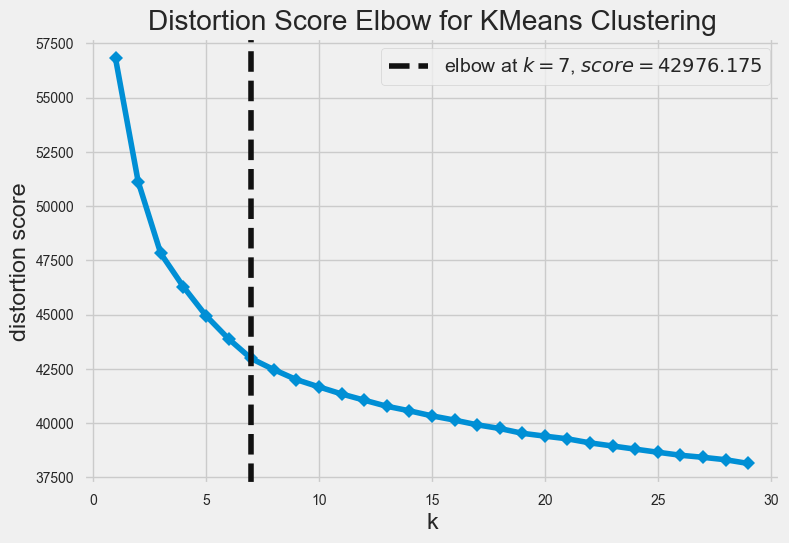

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [154]:
K_means_model = KMeans(n_init = 300)
potential_k_list = list(range(1, 30))
plot_elbow(data, K_means_model, potential_k_list)

##### `From the plot above, a value between around 4 - 7 could be a good value for k`

### Using the elbow method to find the best value for K, trying K-means++ using data after the dimensioality reduction
Note: Distortion is the sum of squared error

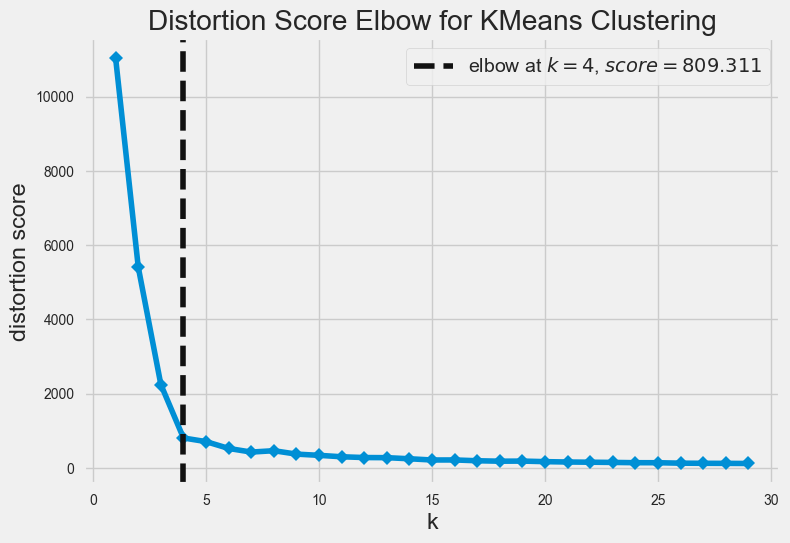

In [160]:
K_means_model_ = KMeans(n_init = "auto") 
plot_elbow(two_components_df, K_means_model_, potential_k_list) 

##### `From the plot above, a value 4 could be a good value for k`

### Plot the silhouette plot for K-means++ trying different values for k using the original dataset

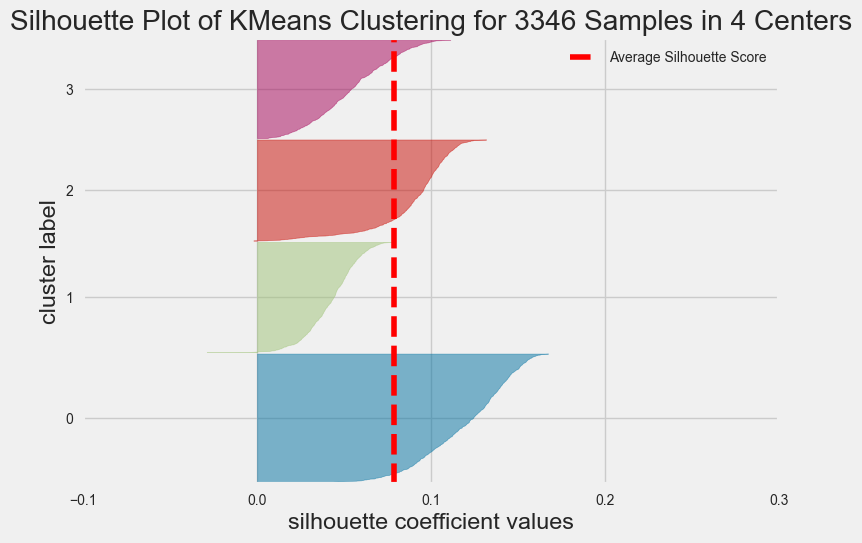

In [126]:
cbc.plot_silhoutte_k_mean(4, KMeans, data) 

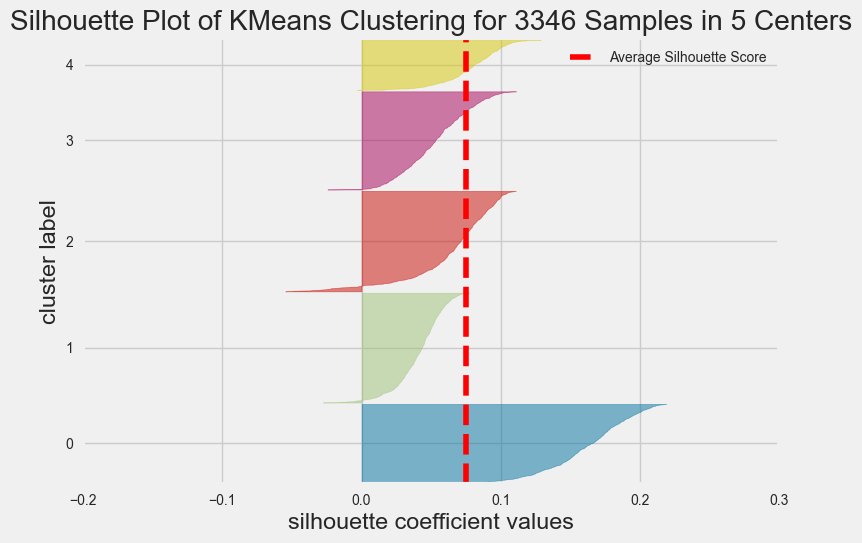

In [127]:
cbc.plot_silhoutte_k_mean(5, KMeans, data)

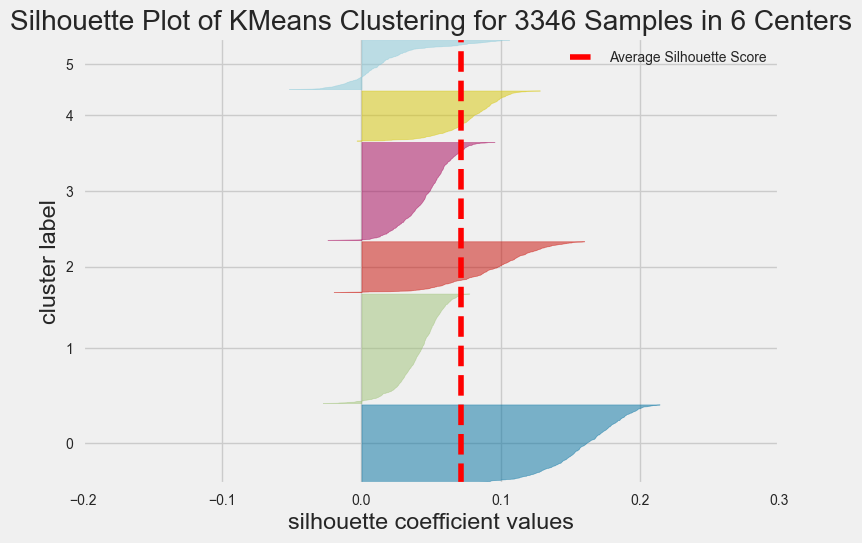

In [128]:
cbc.plot_silhoutte_k_mean(6, KMeans, data)

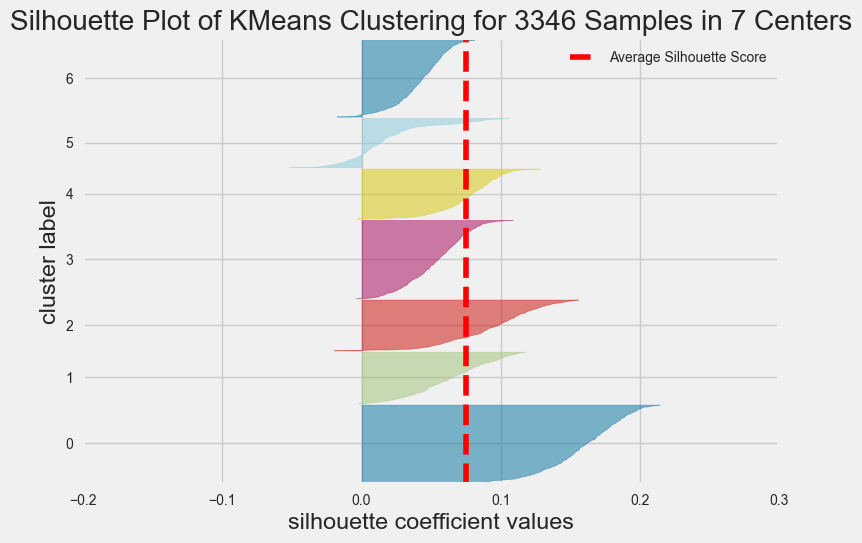

In [129]:
cbc.plot_silhoutte_k_mean(7, KMeans, data)

### Plot the silhouette plot for K-means++ trying different values for k using the data after reduce its dimentions

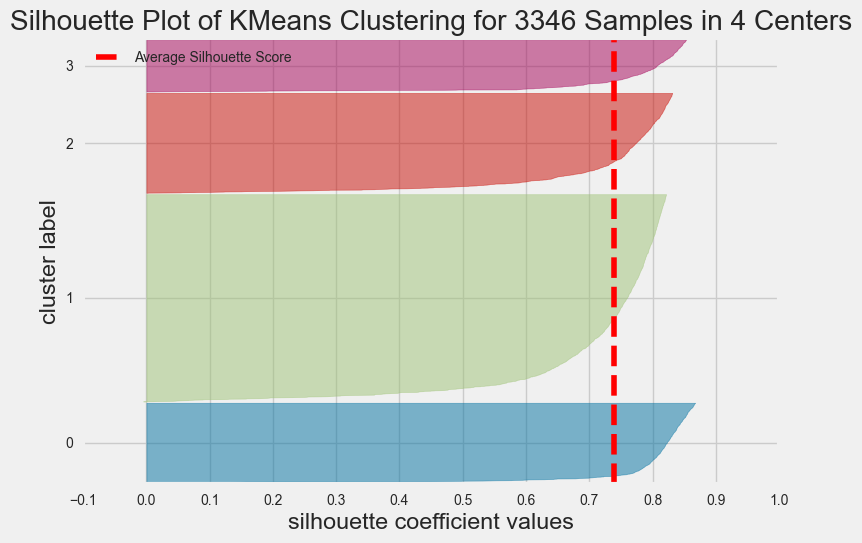

In [166]:
cbc.plot_silhoutte_k_mean(4, KMeans, two_components_df)

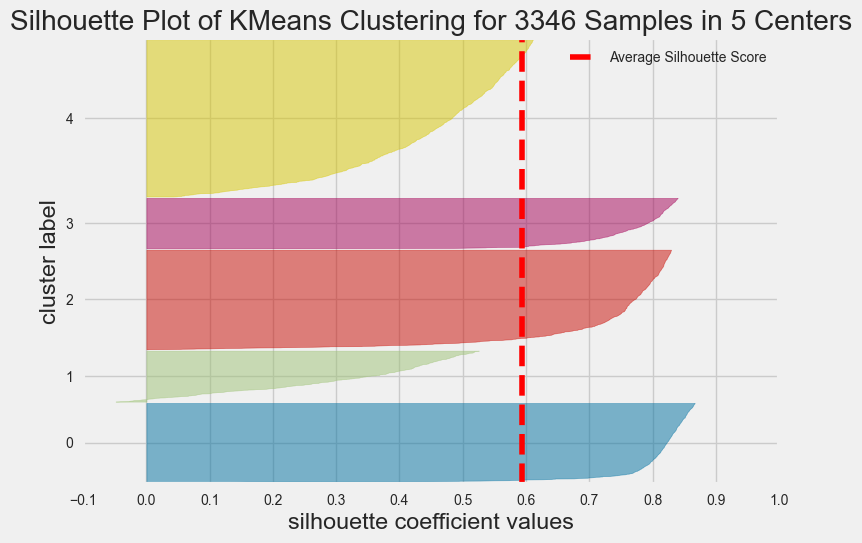

In [167]:
cbc.plot_silhoutte_k_mean(5, KMeans, two_components_df)

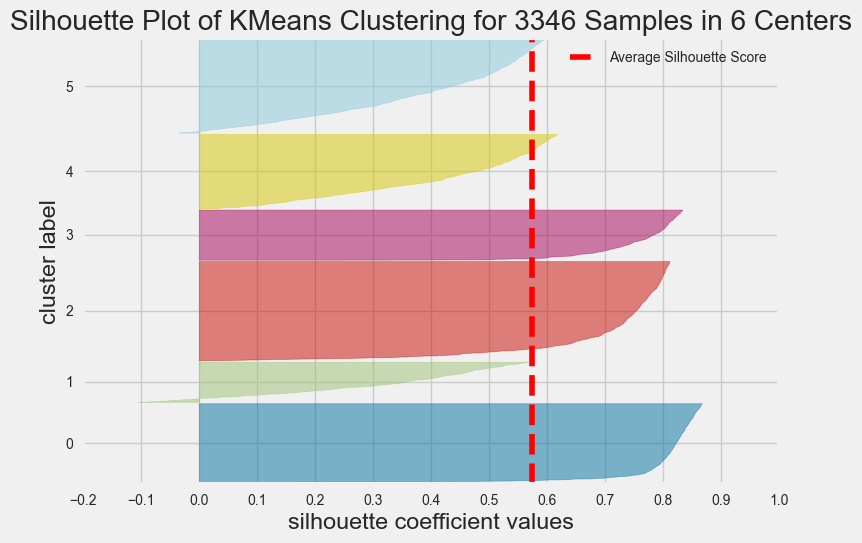

In [168]:
cbc.plot_silhoutte_k_mean(6, KMeans, two_components_df)

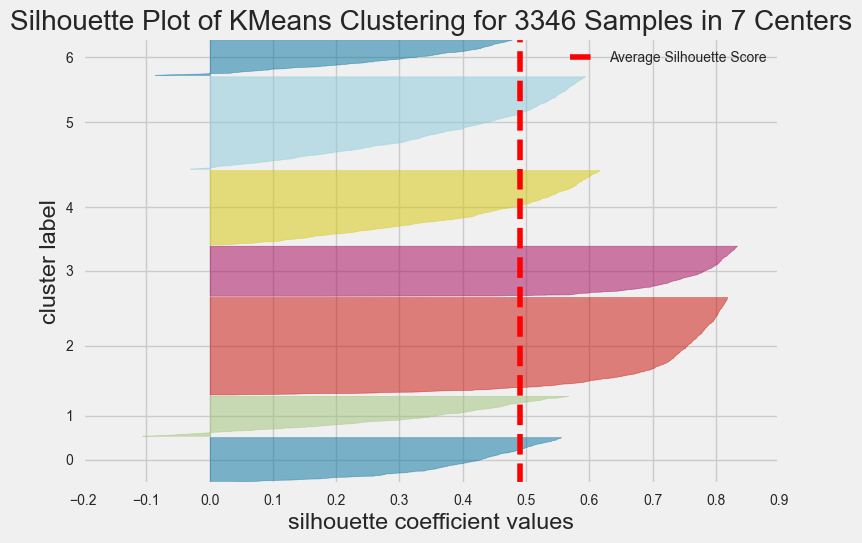

In [165]:
cbc.plot_silhoutte_k_mean(7, KMeans, two_components_df)

##### Using the elbow method to find the best value for K, trying K-medoids using the original dataset

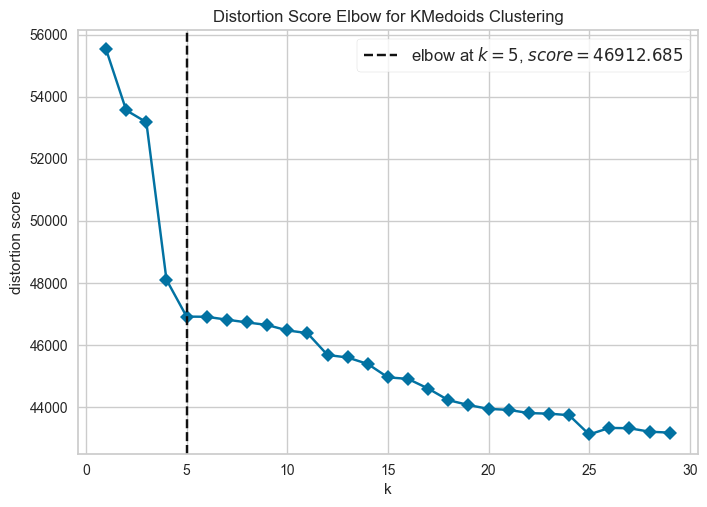

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>

In [27]:
# Instantiate the clustering model and visualizer
K_medoids_model_ = KMedoids()
K_medoids_visualizer_original_data = KElbowVisualizer(K_medoids_model_, k=(1,30), timings=False)
K_medoids_visualizer_original_data.fit(data)# Fit the data to the visualizer
K_medoids_visualizer_original_data.show()# Finalize and render the figure

#### Using the elbow method to find the best value for K, trying K-medoids using data after the dimensioality reduction

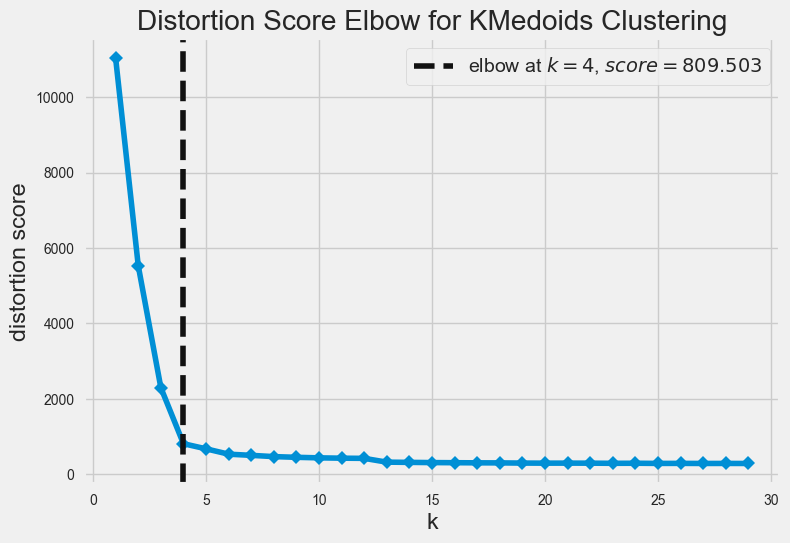

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>

In [117]:
# Instantiate the clustering model and visualizer
K_medoids_model = KMedoids()
K_medoids_visualizer_reduced_data = KElbowVisualizer(K_medoids_model, k=(1,30), timings=False)
K_medoids_visualizer_reduced_data.fit(two_components_df)# Fit the data to the visualizer
K_medoids_visualizer_reduced_data.show()# Finalize and render the figure

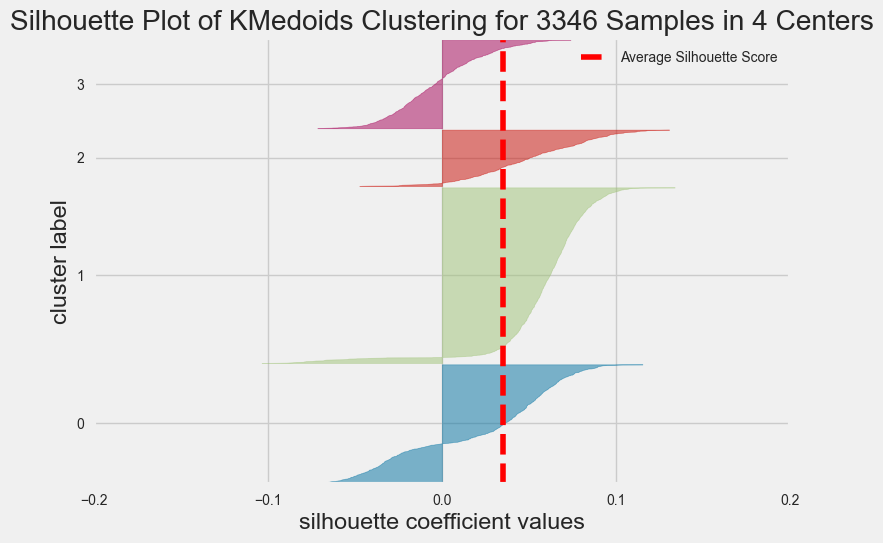

In [133]:
cbc.plot_silhoutte_k_medoids(4, KMedoids, data) 

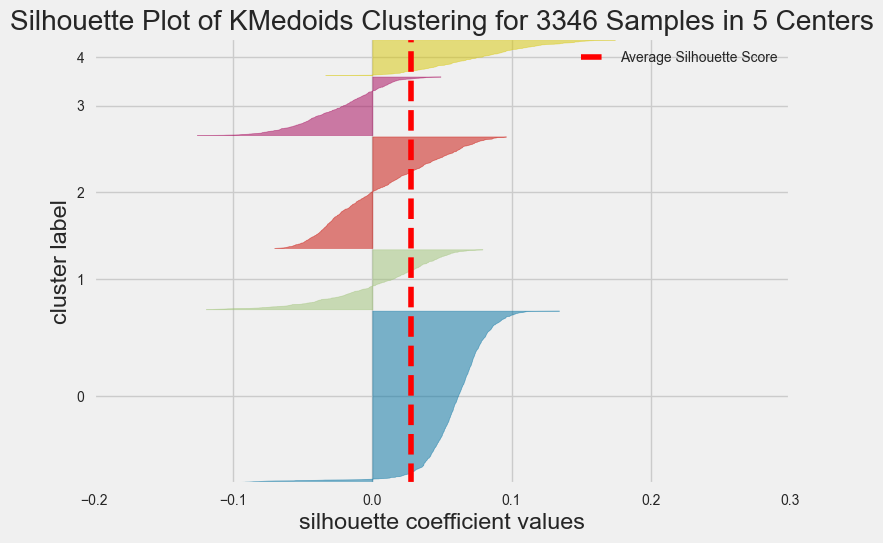

In [135]:
cbc.plot_silhoutte_k_medoids(5, KMedoids, data) 

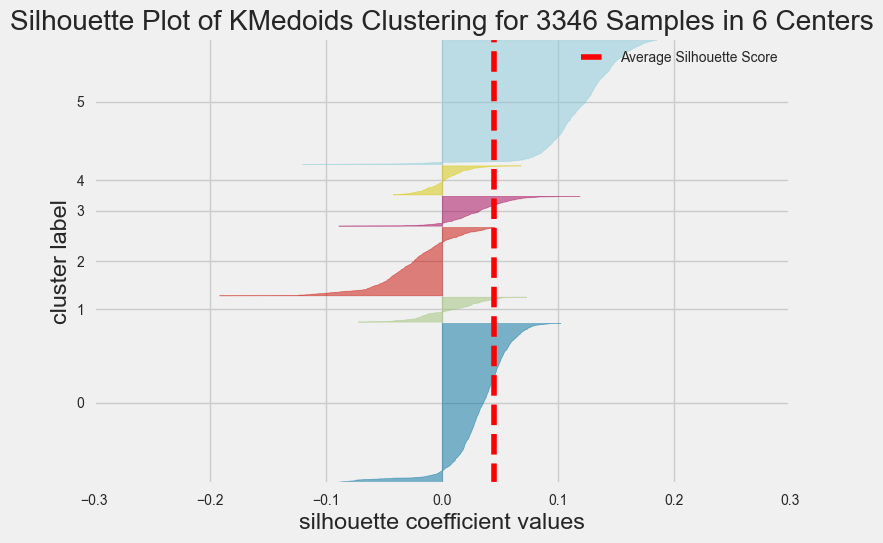

In [136]:
cbc.plot_silhoutte_k_medoids(6, KMedoids, data)

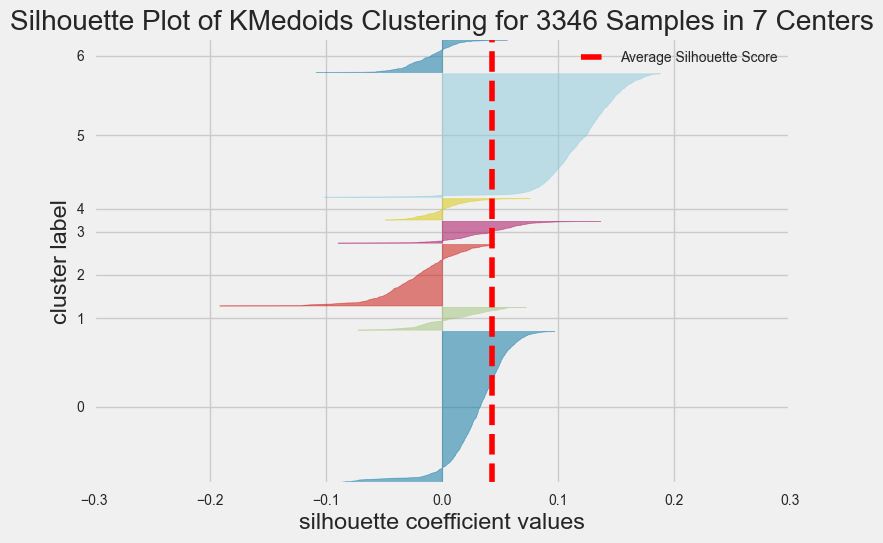

In [137]:
cbc.plot_silhoutte_k_medoids(7, KMedoids, data) 

In [123]:
potential_k_range = list(range(2, 25))
silhouette_score_for_ks = cbc.calculate_silhouette_score(KMeans, potential_k_range, data)

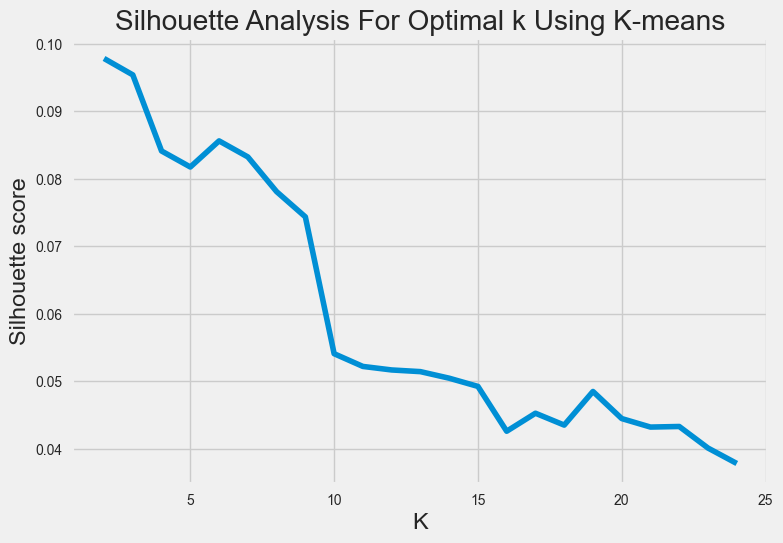

In [111]:
cbc.plot_silhouette_score(potential_k_range, silhouette_score_for_ks, "K-means")

### Silhouette Analysis for Optimal K

In [113]:
silhouette_score_for_medoids_ks = cbc.calculate_silhouette_score(KMedoids, potential_k_range, data)

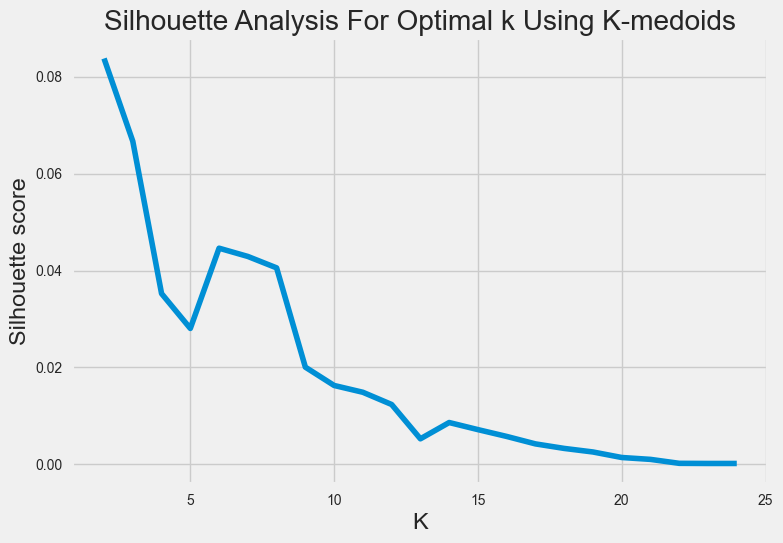

In [114]:
cbc.plot_silhouette_score(potential_k_range, silhouette_score_for_medoids_ks, "K-medoids")

In [155]:
##########################################################3
# pca_centers = pca_model.transform(predicted_centers)
# two_components_df["predicted_cluster"] = predicted_labels

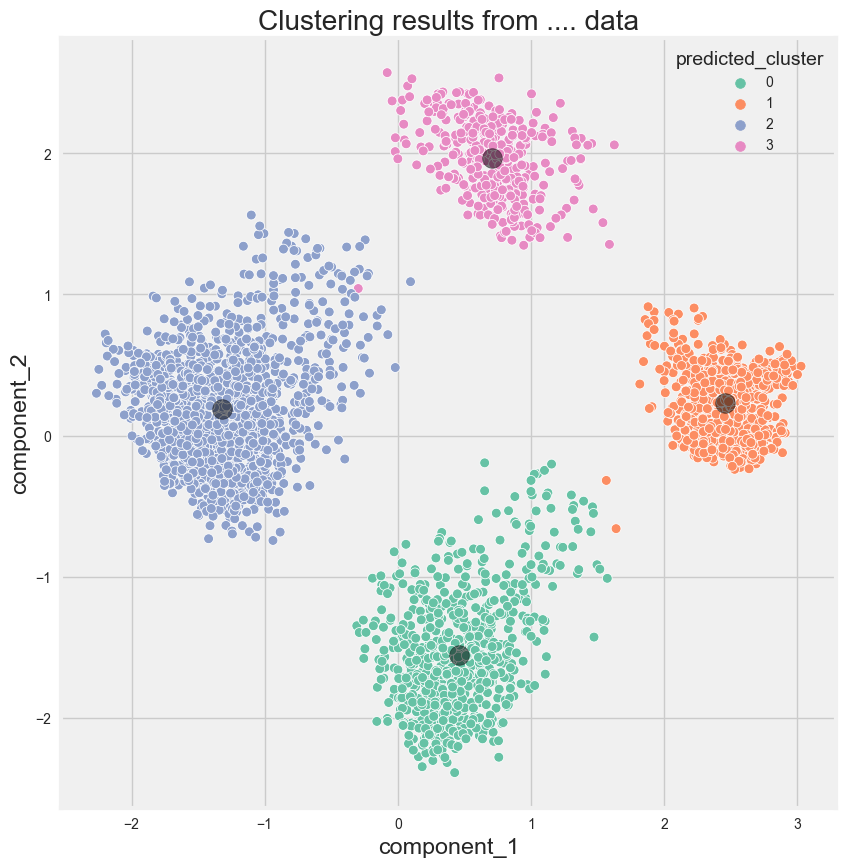

In [33]:
#plot the data and the centroid for each cluster
plt.figure(figsize=(10, 10))
plt.style.use("fivethirtyeight")
scat = sns.scatterplot(
   x="component_1",
   y="component_2",
   # z="component_3",
   s=50,
   data=two_components_df, 
   hue="predicted_cluster",  
   palette="Set2"
)
 
scat.set_title( "Clustering results from .... data") 
plt.scatter(pca_centers[:, 0], pca_centers[:, 1], c='black', s=200, alpha=0.5)
plt.show()

c:\Users\hp\Desktop\Clustering-Analysis\.venv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(
